In [2]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score

In [3]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

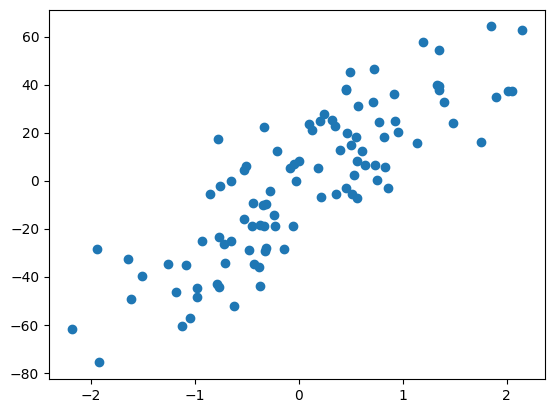

In [4]:
plt.scatter(X,y)

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 2)

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
lr = LinearRegression()

In [8]:
lr.fit(X_train,y_train)

LinearRegression()

In [9]:
print(lr.coef_)
print(lr.intercept_)

[28.12597332]
-2.2710144261783825


In [10]:
y_pred = lr.predict(X_test)

In [11]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6345158782661012

In [12]:
# creating class using derived formula

class Gradient_Descent_Regressor:

  def __init__(self,learning_rate,epochs):
    self.learning_rate = learning_rate
    self.epochs = epochs
    self.m = 100
    self.b = -120
    self.m_hist = []     # <---- added for animation
    self.b_hist = []     # <---- added for animation


  def fit(self,X,y):

    for i in range(self.epochs):
      slope_b = -2 * np.sum(y-self.m * X.ravel() - self.b)
      slope_m = -2 * np.sum((y-self.m * X.ravel() - self.b) * X.ravel())

      # Calculating the new intercept( b ) and ( m )

      # b_new  = b_old - eta(slope) at b = 0
      self.b = self.b - (self.learning_rate * slope_b)

      # m_new  = m_old - eta(slope) at m = 1
      self.m = self.m - (self.learning_rate * slope_m)


      self.m_hist.append(self.m)
      self.b_hist.append(self.b)

    print(self.m,self.b)


  def predict(self,X):
    return self.m * X + self.b


In [13]:
# object

gd = Gradient_Descent_Regressor(0.001,50)

In [14]:
gd.fit(X_train,y_train)

28.159367347119066 -2.3004574196824854


In [15]:
y_pred = gd.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6343842836315579

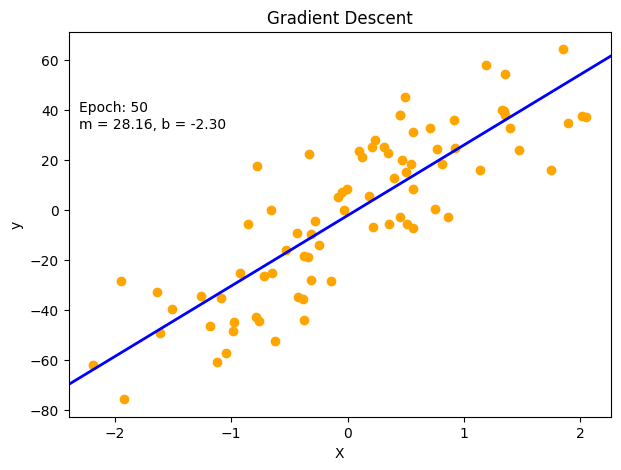

In [17]:
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
import numpy as np

fig, ax = plt.subplots(figsize=(7,5))
ax.scatter(X_train, y_train, color="orange")
ax.set_title("Gradient Descent")
ax.set_xlabel("X")
ax.set_ylabel("y")

line, = ax.plot([], [], color="blue", linewidth=2)
text = ax.text(0.02, 0.75, "", transform=ax.transAxes)

x_vals = np.array([min(X_train)-1, max(X_train)+1])

def init():
    line.set_data([], [])
    text.set_text("")
    return line, text

def animate(i):
    m = gd.m_hist[i]
    b = gd.b_hist[i]
    y_vals = m * x_vals + b

    line.set_data(x_vals, y_vals)
    text.set_text(f"Epoch: {i+1}\nm = {m:.2f}, b = {b:.2f}")
    return line, text

anim = animation.FuncAnimation(
    fig, animate, init_func=init,
    frames=gd.epochs, interval=120, blit=True
)

HTML(anim.to_html5_video())
